In [373]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
import numpy as np 
import matplotlib.pyplot as mtp 
import seaborn as sns
import matplotlib.pyplot as plt

Data Set 


In [374]:
data = pd.read_csv("/content/drive/MyDrive/housing_prices_iteration_7.csv")
print(f'Dataset size: {data.shape}')

Dataset size: (1460, 81)


In [375]:
data_drop = data.drop(['PoolQC', 'Alley','MiscFeature','Fence', 'Id' ], axis = 1)

In [376]:
print(f'Dataset size: {data_drop.shape}')

Dataset size: (1460, 76)


In [377]:
#checking missing data
data_drop.isnull().sum().sort_values(ascending=False)/data_drop.shape[0]

FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
                  ...   
TotalBsmtSF     0.000000
Heating         0.000000
MSZoning        0.000000
CentralAir      0.000000
SalePrice       0.000000
Length: 76, dtype: float64

In [378]:
#checking missing data
data_drop.isnull().sum().sort_values(ascending=False).to_list()


[690,
 259,
 81,
 81,
 81,
 81,
 81,
 38,
 38,
 37,
 37,
 37,
 8,
 8,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [379]:
# sns.pairplot(data=data_drop, diag_kind='kde')
# creating a correlation matrix
#corr = data_drop.corr()

# plotting the heatmap
#f, ax = plt.subplots(figsize=(12,9))

#sns.heatmap(corr, square=True, linecolor='white', vmax=1.0, annot=False,);
#plt.tight_layout()

In [380]:
#corrMatrix = X.corr().abs()
#upper = corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.50
#to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]
#to_drop

In [381]:
#X = X.drop(columns=to_drop)

Define X and y


In [382]:
y = data_drop.pop("SalePrice")
X_real = data_drop

corrMatrix = X.corr().abs()
upper = corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]
X = X_real.drop(columns=to_drop)

# data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

Creating Pipeline_1


In [383]:
from sklearn import set_config
set_config(display = 'diagram')

In [384]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.preprocessing import StandardScaler
# select categorical and numerical column names
X_cat_columns = X.select_dtypes(exclude="number").copy().columns
X_num_columns = X.select_dtypes(include="number").copy().columns

my_scaler = RobustScaler()

# create numerical pipeline, only with the SimpleImputer(strategy="mean")
numeric_pipe = make_pipeline(
    SimpleImputer(strategy="mean"), my_scaler)
 
 # create categorical pipeline, with the SimpleImputer(fill_value="N_A") and the OneHotEncoder
categoric_pipe = make_pipeline(
    SimpleImputer(strategy= "most_frequent" ),  # most_frequent   "constant", fill_value="N_A"
    OneHotEncoder(handle_unknown = 'ignore')
)

In [385]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num_columns),
        ("cat_pipe", categoric_pipe, X_cat_columns),
    ]
)
preprocessor

ColumnTransformer(transformers=[('num_pipe',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('robustscaler',
                                                  RobustScaler())]),
                                 Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'Bsmt...
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object'))])

Select K Best

In [386]:
from sklearn.feature_selection import SelectKBest, f_regression

KBest = SelectKBest(score_func=f_regression, k=129)

Pipeline_2

In [387]:
Pipeline_2 = make_pipeline(preprocessor, 
                              KBest)

Pipeline_3 


In [388]:
from sklearn.linear_model import LinearRegression
pipeline_3 = make_pipeline(Pipeline_2, LinearRegression())

In [389]:
pipeline_3.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('num_pipe',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer()),
                                                                                   ('robustscaler',
                                                                                    RobustScaler())]),
                                                                   Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalB...
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object'))])),
                                 ('selectkbest',
                                  SelectKBest(k=129,
                                              score_func=<function f_regression at 0x7f03cfd8df80>))])),
                ('linearregression', LinearRegression())])

Ckecking Accuracy 

In [390]:
y_train_pred = pipeline_3.predict(X_train)
y_test_pred = pipeline_3.predict(X_test)

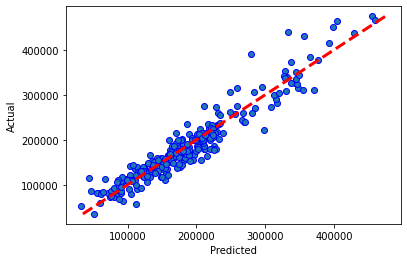

In [391]:
fig, ax = plt.subplots()
ax.scatter(y_test_pred, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()


In [392]:
results = pd.DataFrame({
    'predictions':pipeline_3 .predict((X_test)), 
    'true_values':y_test
})
results.head() 

,predictions,true_values
930,232681.021970,201000
530,189625.140422,175000
1291,122116.060254,119500
1385,119825.319277,125500
305,248652.542065,305900


In [393]:
# model evaluation for testing set
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from math import sqrt
mae = metrics.mean_absolute_error(y_test, y_test_pred)
mse = metrics.mean_squared_error(y_test, y_test_pred)
r2 = metrics.r2_score(y_test, y_test_pred)
rms = sqrt(mean_squared_error(y_test, y_test_pred))

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rms))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 17512.85970300616
MSE is 574087225.6272593
RMSE is 23960.11739594068
R2 score is 0.9117763666370875


Use DecisionTreeRegressor to check comparison between values of LinearReg and DecisionTreeRegressor

In [394]:
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
pipeline_4 = make_pipeline(Pipeline_2, XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4))
#pipeline_4 = make_pipeline(Pipeline_2, DecisionTreeRegressor())
pipeline_4.fit(X_train, y_train)


[00:04:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('num_pipe',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer()),
                                                                                   ('robustscaler',
                                                                                    RobustScaler())]),
                                                                   Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalB...
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object'))])),
                                 ('selectkbest',
                                  SelectKBest(k=129,
                                              score_func=<function f_regression at 0x7f03cfd8df80>))])),
                ('xgbregressor',
                 XGBRegressor(learning_rate=0.05, n_estimators=1000,
                              n_jobs=4))])

In [395]:
y_train_pred_2 = pipeline_4.predict(X_train)
y_test_pred_2 = pipeline_4.predict(X_test)

In [396]:
results_2 = pd.DataFrame({
    'predictions':pipeline_4 .predict((X_test)), 
    'true_values':y_test
})
results_2.head() 

,predictions,true_values
930,226849.531250,201000
530,188324.078125,175000
1291,113150.781250,119500
1385,115576.343750,125500
305,324038.843750,305900


In [397]:
# model evaluation for testing set
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from math import sqrt
mae = metrics.mean_absolute_error(y_test, y_test_pred_2)
mse = metrics.mean_squared_error(y_test, y_test_pred_2)
r2 = metrics.r2_score(y_test, y_test_pred_2)
rms = sqrt(mean_squared_error(y_test, y_test_pred_2))

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rms))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 14548.471532534246
MSE is 509868706.7262189
RMSE is 22580.272512222233
R2 score is 0.921645234665712


In [403]:
data_kaggel = pd.read_csv("/content/drive/MyDrive/test_kaggle.csv")

In [404]:
test = pipeline_4.predict(data_kaggel)
test

array([121363.484, 159660.8  , 183080.66 , ..., 167663.28 , 124351.16 ,
       237070.12 ], dtype=float32)

In [405]:
data_kaggel["SalePrice"] = test

In [406]:
data_kaggel["SalePrice"]

0       121363.484375
1       159660.796875
2       183080.656250
3       194219.031250
4       190615.093750
            ...      
1454     81491.164062
1455     80886.710938
1456    167663.281250
1457    124351.156250
1458    237070.125000
Name: SalePrice, Length: 1459, dtype: float32

In [407]:
Submission = data_kaggel[["Id","SalePrice"]]

In [408]:
Submission.to_csv("results.csv", index = False)
from google.colab import files
#files.download('results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 PCA

In [398]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from scipy.stats import randint
import time

In [399]:
Pipeline_5 = make_pipeline(preprocessor
                              )

In [400]:
start_time = time.time()
neigh1 = KNeighborsClassifier()

param_distribs={"n_neighbors": randint(low=3, high=30),
                "weights":["uniform", "distance"],
                "p":[1,2]}

neigh1_search = RandomizedSearchCV(neigh1,
                                   param_distribs,
                                   scoring="accuracy",
                                   n_iter=50,
                                   cv=5,
                                   n_jobs=4,
                                   random_state=123)

model_pipeline = make_pipeline(Pipeline_5,
                                 
                                 neigh1_search)
model_pipeline.fit(X_train, y_train)


print("--- %s seconds ---" % (time.time() - start_time))
print(round(neigh1_search.best_score_, 2))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


--- 20.37558674812317 seconds ---
0.01


In [401]:
model_pipeline["randomizedsearchcv"].best_score_

0.012849858772605555

In [402]:
model_pipeline["randomizedsearchcv"].best_params_

{'n_neighbors': 22, 'p': 1, 'weights': 'distance'}